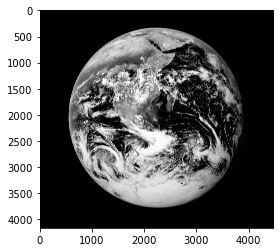

In [3]:
from matplotlib.image import imread
from matplotlib.image import imsave
import matplotlib.pyplot as plt
import numpy as np
import os

file='Tierra.jpg';
img_orig = imread(file); # En img_orig se guarda un arreglo de tres matrices cada una de ellas contiene la intensidad del piexel en los canales RGB.
#A=img_orig[:,:,0]; #Acá se toma uno de los canales.
A=np.mean(img_orig,-1);# Acá se promedia la intensidad de todos los canales.
# Se imprime la imágen.
img=plt.imshow(A);
img.set_cmap('gray');
plt.show();

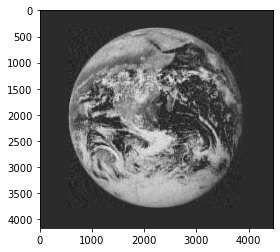

El porcentaje de reducción es 49.87 %


In [4]:
U, S, VT=np.linalg.svd(A) # Se calcula la SVD de la matriz con la que estamos trabajando.
S=np.diag(S) # La SVD devuelve los valores singulares y acá construimos la matriz Sigma.

# Se seleccióna cuántos valores singulares se toman para reconstruir la imágen.
k=50; 
Ared = U[:,:k] @ S[0:k,:k] @ VT[:k,:]; # Recompone la imágen usando los k valores singulares seleccionados.
# Se muestra la imágen reducida.
img=plt.imshow(Ared);
img.set_cmap('gray');
plt.show();
# Guardar la imagen.
file_red=os.path.splitext(file)[0]+'_red'+os.path.splitext(file)[1]; # esto solo es para agregar "_red" al archivo con la imágen reducida
imsave(file_red,Ared,cmap="gray");
# Esto es para comparar los tamaños de los archvos y ver cuánto se redujo.
sizeOrig=os.stat(file).st_size;
sizeRed=os.stat(file_red).st_size;
reduc=100*(sizeOrig-sizeRed)/sizeOrig; # Porcentaje de reducción.
print(f'El porcentaje de reducción es {reduc:.2f} %');
